#### Notes from the Readme File

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('./data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('.', 'data', 'images*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)

#all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
89648,00022260_006.png,No Finding,6,22260,054Y,F,PA,2992,2991,0.143,0.143,NaN,.\data\images\00022260_006.png
53919,00013608_000.png,Effusion|Mass,0,13608,016Y,M,AP,2500,2048,0.168,0.168,NaN,.\data\images\00013608_000.png
66479,00016429_041.png,Pneumothorax,41,16429,047Y,F,PA,2992,2991,0.143,0.143,NaN,.\data\images\00016429_041.png


# Preprocessing Labels
Here we take the labels and make them into a more clear format. The primary step is to see the distribution of findings and then to convert them to simple binary labels

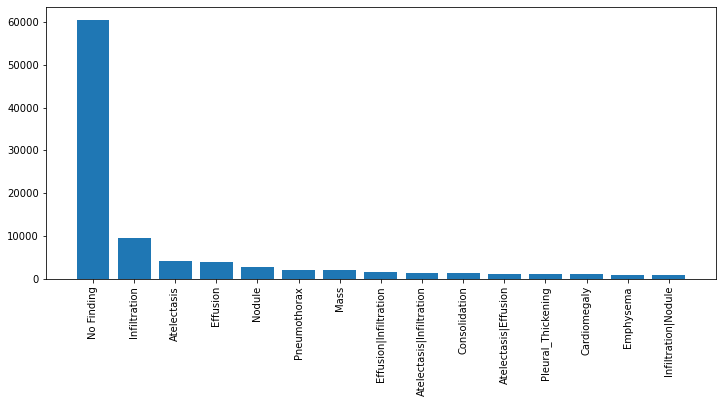

In [3]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 5))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [5]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', 'Normal'))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(5)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Normal', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Normal,Pleural_Thickening,Pneumonia,Pneumothorax
19571,00005201_002.png,Effusion|Infiltration,2,5201,047Y,M,AP,2500,2048,0.171000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34108,00008924_003.png,Consolidation|Mass,3,8924,054Y,M,PA,2992,2881,0.143000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36990,00009736_007.png,Emphysema,7,9736,066Y,F,AP,2500,2048,0.168000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12230,00003190_000.png,Normal,0,3190,046Y,F,PA,2986,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
108702,00029481_012.png,Effusion|Infiltration|Nodule|Pleural_Thickenin...,12,29481,052Y,F,PA,2021,2021,0.194314,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# for num in range(0,np.size(all_labels)):
#     if all_labels[num] in 'Normal' or all_labels[num] in 'Pneumothorax':
#         print(all_labels[num])
#     else:
#         all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace(all_labels[num], 'Non-pneumo'))
#         all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('|',''))

# all_labels = ['Normal', 'Pneumothorax', 'Non-pneumo']
# print('All Labels ({}): {}'.format(len(all_labels), all_labels))
# for c_label in all_labels:
#     if len(c_label)>1: # leave out empty labels
#         all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
# all_xray_df.sample(5)

In [6]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Normal',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

### Clean categories
Since we have too many categories, we can prune a few out by taking the ones with only a few examples

In [7]:
for c_label in all_labels:
    print(c_label + ": " + str(all_xray_df[c_label].sum()))

grouped_df = dict(tuple(all_xray_df.groupby('Finding Labels')))

Atelectasis: 11535.0
Cardiomegaly: 2772.0
Consolidation: 4667.0
Edema: 2303.0
Effusion: 13307.0
Emphysema: 2516.0
Fibrosis: 1686.0
Hernia: 227.0
Infiltration: 19870.0
Mass: 5746.0
Nodule: 6323.0
Normal: 60412.0
Pleural_Thickening: 3385.0
Pneumonia: 1353.0
Pneumothorax: 5298.0


In [26]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (14) [('Atelectasis', 11535), ('Cardiomegaly', 2772), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13307), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19870), ('Mass', 5746), ('Nodule', 6323), ('Normal', 60412), ('Pleural_Thickening', 3385), ('Pneumonia', 1353), ('Pneumothorax', 5298)]


<h2>DATA CLEANING: KATEGORI NORMAL DAN PNEUMOTHORAX</h2>
Bagian ini akan memecah dataframe berdasarkan labelnya, dan akan diambil dataframe Normal dan Pneumothorax saja.
Dari bagian di atas dapat diketahui bahwa jumlah data untuk label normal adalah 60000, sedangkan Pneumothorax hanya 5200, data ini tidak seimbang, sehingga perlu dilakukan penyamaan frekuensi (sekitar 50% 50%)

In [9]:
for c_label in all_labels:
    print(c_label + "_df= grouped_df['" + c_label+"'].sample(50)")

Atelectasis_df= grouped_df['Atelectasis'].sample(50)
Cardiomegaly_df= grouped_df['Cardiomegaly'].sample(50)
Consolidation_df= grouped_df['Consolidation'].sample(50)
Edema_df= grouped_df['Edema'].sample(50)
Effusion_df= grouped_df['Effusion'].sample(50)
Emphysema_df= grouped_df['Emphysema'].sample(50)
Fibrosis_df= grouped_df['Fibrosis'].sample(50)
Hernia_df= grouped_df['Hernia'].sample(50)
Infiltration_df= grouped_df['Infiltration'].sample(50)
Mass_df= grouped_df['Mass'].sample(50)
Nodule_df= grouped_df['Nodule'].sample(50)
Normal_df= grouped_df['Normal'].sample(50)
Pleural_Thickening_df= grouped_df['Pleural_Thickening'].sample(50)
Pneumonia_df= grouped_df['Pneumonia'].sample(50)
Pneumothorax_df= grouped_df['Pneumothorax'].sample(50)


In [47]:
for c_label in all_labels:
    print(c_label + "_df, ")

Atelectasis_df, 
Cardiomegaly_df, 
Consolidation_df, 
Edema_df, 
Effusion_df, 
Emphysema_df, 
Fibrosis_df, 
Hernia_df, 
Infiltration_df, 
Mass_df, 
Nodule_df, 
Normal_df, 
Pleural_Thickening_df, 
Pneumonia_df, 
Pneumothorax_df, 


In [11]:
Atelectasis_df= grouped_df['Atelectasis'].sample(50)
Cardiomegaly_df= grouped_df['Cardiomegaly'].sample(50)
Consolidation_df= grouped_df['Consolidation'].sample(50)
Edema_df= grouped_df['Edema'].sample(50)
Effusion_df= grouped_df['Effusion'].sample(50)
Emphysema_df= grouped_df['Emphysema'].sample(50)
Fibrosis_df= grouped_df['Fibrosis'].sample(50)
Hernia_df= grouped_df['Hernia'].sample(50)
Infiltration_df= grouped_df['Infiltration'].sample(50)
Mass_df= grouped_df['Mass'].sample(50)
Nodule_df= grouped_df['Nodule'].sample(50)
Normal_df= grouped_df['Normal'].sample(50)
Pleural_Thickening_df= grouped_df['Pleural_Thickening'].sample(50)
Pneumonia_df= grouped_df['Pneumonia'].sample(50)
Pneumothorax_df= grouped_df['Pneumothorax'].sample(50)

fix_df = pd.concat([Atelectasis_df, Cardiomegaly_df, Consolidation_df, Edema_df, Effusion_df, Emphysema_df, Fibrosis_df, Hernia_df, Infiltration_df, Mass_df, Nodule_df, Normal_df, Pleural_Thickening_df, Pneumonia_df, Pneumothorax_df])
fix_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Normal,Pleural_Thickening,Pneumonia,Pneumothorax
21093,00005639_001.png,Normal,1,5639,028Y,M,PA,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38964,00010196_000.png,Nodule,0,10196,054Y,F,PA,2834,2989,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
110508,00030101_005.png,Pleural_Thickening,5,30101,068Y,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63127,00015605_035.png,Edema,35,15605,032Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30263,00007887_000.png,Hernia,0,7887,079Y,M,PA,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97782,00025802_000.png,Mass,0,25802,036Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22060,00005839_004.png,Emphysema,4,5839,056Y,M,AP,2500,2048,0.171,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99961,00026478_001.png,Edema,1,26478,058Y,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50441,00012778_000.png,Fibrosis,0,12778,033Y,M,PA,2500,2048,0.168,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76295,00018724_017.png,Consolidation,17,18724,044Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
fix_df.sum()

Image Index                    00017903_007.png00019271_030.png00010914_009.p...
Finding Labels                 AtelectasisAtelectasisAtelectasisAtelectasisAt...
Follow-up #                                                                 6875
Patient ID                                                              10694637
Patient Age                    024Y055Y050Y073Y039Y054Y061Y057Y048Y053Y073Y05...
Patient Gender                 MMMMFMMMFMMFMMMMMMFMMFMFFMFFFFMMMMFFFMMMMFFFMM...
View Position                  APAPAPPAPAPAPAAPAPAPPAAPPAPAAPPAAPAPAPAPAPPAPA...
OriginalImage[Width                                                      1992487
Height]                                                                  1856956
OriginalImagePixelSpacing[x                                               116.71
y]                                                                        116.71
Unnamed: 11                                                                    0
path                        

In [13]:
for c_label in all_labels:
    print(c_label + ": " + str(fix_df[c_label].sum()))


Atelectasis: 50.0
Cardiomegaly: 50.0
Consolidation: 50.0
Edema: 50.0
Effusion: 50.0
Emphysema: 50.0
Fibrosis: 50.0
Hernia: 50.0
Infiltration: 50.0
Mass: 50.0
Nodule: 50.0
Normal: 50.0
Pleural_Thickening: 50.0
Pneumonia: 50.0
Pneumothorax: 50.0


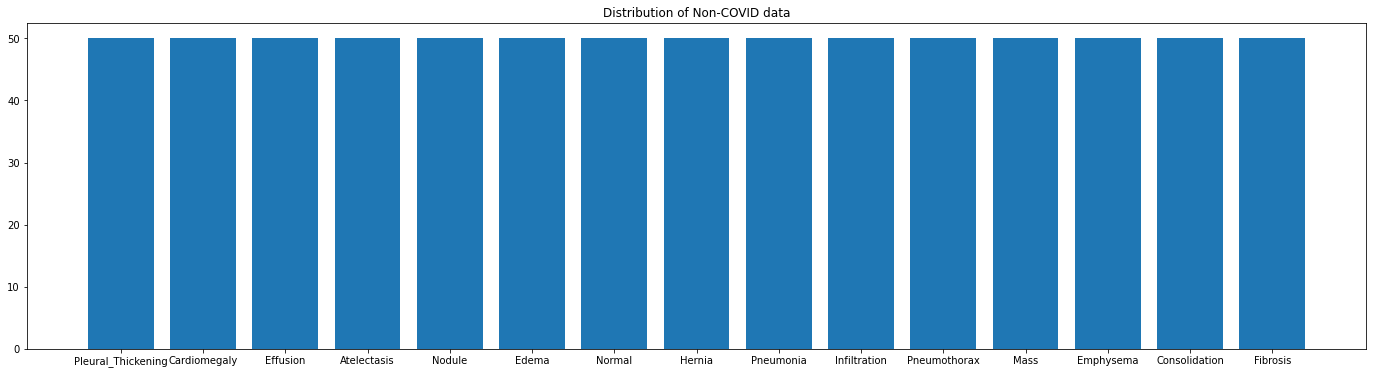

In [14]:
label_counts = fix_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (24, 6))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_title('Distribution of Non-COVID data')
_ = ax1.set_xticklabels(label_counts.index)

In [15]:
print(label_counts)
print("Total:" + str(sum(label_counts)))


Pleural_Thickening    50
Cardiomegaly          50
Effusion              50
Atelectasis           50
Nodule                50
Edema                 50
Normal                50
Hernia                50
Pneumonia             50
Infiltration          50
Pneumothorax          50
Mass                  50
Emphysema             50
Consolidation         50
Fibrosis              50
Name: Finding Labels, dtype: int64
Total:750


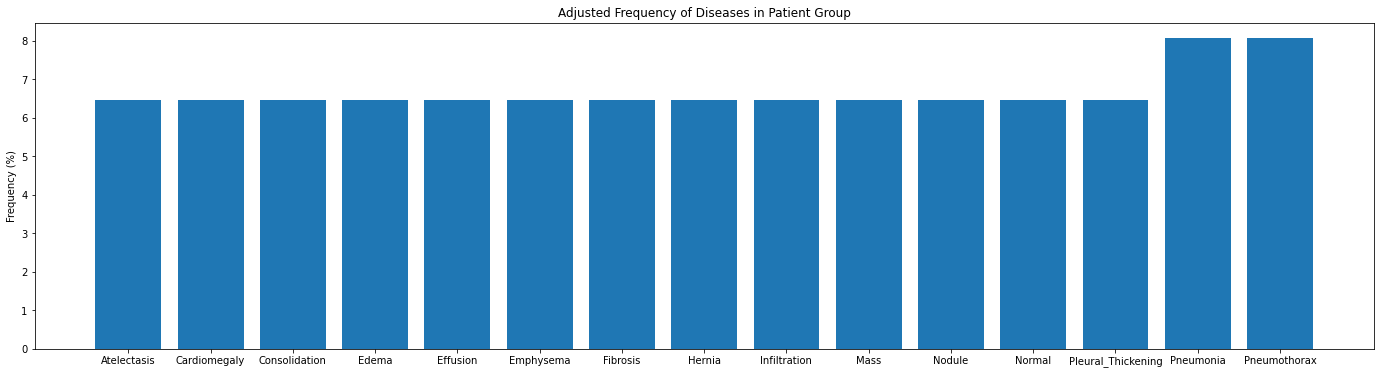

In [25]:
label_counts = 100*np.mean(fix_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (24, 6))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [26]:
label_counts

array([6.4516129 , 6.4516129 , 6.4516129 , 6.4516129 , 6.4516129 ,
       6.4516129 , 6.4516129 , 6.4516129 , 6.4516129 , 6.4516129 ,
       6.4516129 , 6.4516129 , 6.4516129 , 8.06451613, 8.06451613])

# SAVE CSV FILE

In [27]:
fix_df.to_csv('./data/18october.csv')


# PREPARING DATA
Here we split the data into training and validation sets and create a single vector (disease_vec) with the 0/1 outputs for the disease status (what the model will try and predict)

In [ ]:
fix_df['disease_vec'] = fix_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0]) #add categorical label in column disease_vec)
fix_df['num_label'] = fix_df['Finding Labels'].map(lambda x: all_labels.index(x)) #add numerical label in column num_label

In [ ]:
fix_df.sample(10)

In [ ]:
#NOTE: SPLITTING DATASET FOR TRAINING AND TESTING SET
from sklearn.model_selection import train_test_split
alltrain_df, test_df = train_test_split(fix_df, 
                                   test_size = 0.1, 
                                   random_state = 2018,
                                   stratify = fix_df['Finding Labels'].map(lambda x: x[:3]))
print('train', alltrain_df.shape[0], 'test', test_df.shape[0])

In [ ]:
#NOTE: SPLITTING TRAINING SET FOR TRAINING AND VALIDATION 
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(alltrain_df, 
                                   test_size = 0.2, 
                                   random_state = 2018)
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

In [ ]:
train_df['Finding Labels'

In [ ]:
#MELIHAT JUMLAH DATA DARI SETIAP LABEL
for c_label in all_labels:

    print(c_label+": " + str(train_df[c_label].sum()))
    print(c_label+": " + str(valid_df[c_label].sum()))
    print(c_label+": " + str(test_df[c_label].sum()))

# Create Data Generators NUMERICAL LABEL
Here we make the data generators for loading and randomly transforming images

In [ ]:
#NOTE: ADDING NEW COLUMN OF LABEL, NEEDED FOR CATEGORICAL LABEL IN DATASET

test_df['newLabel'] = test_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [ ]:
realdatagen = ImageDataGenerator(horizontal_flip=False,
                                   vertical_flip=False,
                                   rescale=1/255.0)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (150, 150)
datagen = ImageDataGenerator(horizontal_flip = False,
                            vertical_flip = False,
                            rescale=1/255.0,
                            fill_mode='reflect',
                            shear_range=0.1,
                            zoom_range=0.3)

In [ ]:
train_X, train_Y = next(datagen.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'num_label', 
                             class_mode = 'raw',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 5904))


In [ ]:
valid_X, valid_Y = next(datagen.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'num_label', 
                             class_mode = 'raw',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1476))

In [ ]:
test_X, test_Y = next(datagen.flow_from_dataframe(dataframe=test_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'num_label', 
                             class_mode = 'raw',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 820))

In [ ]:
print(np.shape(test_X))

In [ ]:
plt.imshow(test_X[11], cmap='bone')  # graph it
plt.colorbar()
plt.show()  # display!

In [ ]:
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(test_X, test_Y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    # c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y)if n_score>0.5]))
    c_ax.axis('off')

# DATA GENERATORS FOR CATEGORICAL LABEL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (150, 150)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = False, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.01, 
                              rotation_range=5, 
                              shear_range = 0.05,
                              fill_mode = 'reflect',
                              zoom_range=0.1)

In [ ]:
train_X, train_Y = next(core_idg.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'num_label', 
                             class_mode = 'raw',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32))

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

In [ ]:
train_Y

In [ ]:
np.shape(valid_gen[0][0])

In [ ]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [ ]:
np.shape(t_x)

# Create a simple model
Here we make a simple model to train using MobileNet as a base and then adding a GAP layer (Flatten could also be added), dropout, and a fully-connected layer to calculate specific features

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers, callbacks, regularizers
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import VGG19
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers, callbacks, regularizers
import tensorflow.keras
#base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:], 
                                 #include_top = False, weights = None)
#base_vgg_model = VGG19(input_shape =  t_x.shape[1:], 
#                                include_top = False, weights = None)
base_inception_resnet_model = InceptionResNetV2(input_shape =  t_x.shape[1:],
                                 include_top = False, weights = None)
#base_inception_v3_model = InceptionV3(input_shape =  t_x.shape[1:],
#                                 include_top = False, weights = None)
#base_mobilenetv2_model = MobileNetV2(input_shape =  t_x.shape[1:], 
#                                 include_top = False, weights = None)

#multi_disease_model = Sequential()
#multi_disease_model.add(base_mobilenet_model)
#multi_disease_model.add(GlobalAveragePooling2D())
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(512))
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
#multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                           metrics = ['binary_accuracy', 'mae'])

#VGG
# Freeze the layers
#base_vgg_model.trainable = True

#set_trainable = False
#for layer in base_vgg_model.layers:
#    if layer.name in ['block5_conv1', 'block4_conv1']:
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False

#multi_disease_model = Sequential()
#multi_disease_model.add(base_vgg_model)
#multi_disease_model.add(GlobalAveragePooling2D())
#multi_disease_model.add(Dropout(0.2))
#multi_disease_model.add(Dense(512, activation = 'relu'))
#multi_disease_model.add(Dropout(0.2))
#multi_disease_model.add(Dense(512, activation = 'relu'))
#multi_disease_model.add(Dropout(0.2))
#multi_disease_model.add(Dense(512, activation = 'relu'))
#multi_disease_model.add(Dropout(0.2))
#multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
#multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                          metrics = ['binary_accuracy', 'mae'])


#RESNET
#Freeze the layers
base_inception_resnet_model.trainable = True

set_trainable = False
for layer in base_inception_resnet_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

multi_disease_model = Sequential()
multi_disease_model.add(base_inception_resnet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.3))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.3))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                          metrics = ['binary_accuracy', 'mae'])

#INCEPETIONV3
#Freeze the layers
#base_inception_v3_model.trainable = True

#set_trainable = False
#for layer in base_inception_v3_model.layers:
#    if layer.name in ['block5_conv1', 'block4_conv1']:
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False

#multi_disease_model = Sequential()
#multi_disease_model.add(base_inception_v3_model)
#multi_disease_model.add(GlobalAveragePooling2D())
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(512, activation = 'relu'))
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
#multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                          metrics = ['binary_accuracy', 'mae'])

#MobileNetV2
#Freeze the layers
#base_mobilenetv2_model.trainable = True

#set_trainable = False
#for layer in base_mobilenetv2_model.layers:
#    if layer.name in ['block5_conv1', 'block4_conv1']:
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False

#multi_disease_model = Sequential()
#multi_disease_model.add(base_mobilenetv2_model)
#multi_disease_model.add(GlobalAveragePooling2D())
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(512, activation = 'relu'))
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(512, activation = 'relu'))
#multi_disease_model.add(Dropout(0.3))
#multi_disease_model.add(Dense(len(all_labels), activation = 'softmax'))
#multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                          metrics = ['binary_accuracy', 'mae'])

multi_disease_model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
# weight_path="{}_weights.best.hdf5".format('xray_class')
weight_path="{}_weights_vgg.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)
callbacks_list = [checkpoint, early]

# First Round
Here we do a first round of training to get a few initial low hanging fruit results

In [ ]:
multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch=100,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 1, 
                                  callbacks = callbacks_list)

# Check Output
Here we see how many positive examples we have of each category

In [ ]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

# ROC Curves
While a very oversimplified metric, we can show the ROC curve for each metric

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

In [ ]:
all_labels

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels[11:12]):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

### Optimizer Selection

In [ ]:
optimizers_list = [('sgd',optimizers.SGD( lr=.1) ),
                   ('sgd_momentum',optimizers.SGD(lr=.1, momentum=.9) ),
                   ('adagrad',optimizers.Adagrad()),
                   ('adadelta',optimizers.Adadelta()),
                   ('adam', optimizers.Adam()) 
                  ]

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)
callbacks_list = [early]

In [ ]:
plt.figure(figsize=(20,5))
for optimizer in optimizers_list:
    multi_disease_model.compile(optimizer = optimizer[1], loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
    
    history = multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch=5,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)
      
    
    plt.plot(history.history['val_loss'])
    
plt.legend([x[0] for x in optimizers_list], loc='upper right')
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('optimizer_selection.png', bbox_inches='tight')

# Continued Training
Now we do a much longer training process to see how the results improve

In [ ]:
multi_disease_model.fit_generator(train_gen, 
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y), 
                                  epochs = 100, 
                                  callbacks = callbacks_list)

In [ ]:
# load the best weights
multi_disease_model.load_weights(weight_path)

In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

In [ ]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(pred_Y,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

# Show a few images and associated predictions

In [ ]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, test_Y[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

In [ ]:
np.shape(test_Y)

In [ ]:
import cv2
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
basepath = "D:/JCM ELEKTRO ITS/Disertasi/Deep Learning/Thorax/NIH-Chest-X-rays-Classification-master/src/data/predict"
images = os.listdir(basepath)
predict_image =[]
IMG_SIZE = 128
class_num =1
name_array = []
#Collecting images for prediction
for image in images:
    image_path = os.path.join(basepath, image).replace("\\","/")
    
    img_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)  # convert to array
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
    # print(image)
    name_array.append(image)
    # plt.imshow(img_array, cmap='gray')  # graph it
    # plt.show()  # display!
    predict_image.append(img_array)

X_predict = np.array(predict_image)
X_predict = np.array(X_predict).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_predict = X_predict/255

In [ ]:
np.shape(X_predict)

In [ ]:
new_predict = multi_disease_model.predict(X_predict, batch_size = 32, verbose = True)

In [ ]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(new_predict,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

In [ ]:
new_predict[0]

In [ ]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(new_predict,0), 
                                     100*np.mean(X_predict,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

In [ ]:
pred_Y

In [ ]:
pred_Y[0][11]

In [ ]:
test_Y[0]

In [ ]:
np.shape(test_Y)

In [ ]:
np.shape(test_X)

In [ ]:
test_Y[0]


In [ ]:
pred_Y[0]

In [ ]:
pred_Y

In [ ]:
for num, image in enumerate(images):
    image_path = os.path.join(basepath, image).replace("\\","/")
    img_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)  # convert to array
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
    # print(image)
    name_array.append(image)
    
    pred = new_predict[num]

    result = ""
    for i, label in enumerate(all_labels):
        if pred[i]>0.504: #tentukan sendiri treshold-nya
            result += all_labels[i] + ':'+ str(pred[i]) +'\n' #menggabungkan label dan hasil prediksi
    plt.imshow(img_array, cmap='gray')  # graph it
    # plt.title(result)
    plt.suptitle("Hasil Prediksi Citra "+str(num+1)+"\n", y=1.08, fontsize=12)
    plt.title(result, fontsize=10)
    plt.show()  # display!

In [ ]:
all_labels[1]